# NFL Big Data Bowl 2023
## Using Transfer Learning To Measure Offensive Line Performance 

##### Zachary Galante, University of California, Berkeley, School of Information
##### Dr. James G. Shanahan, University of California, Berkeley, School of Information


# Background 

It is often said in football that it all starts in the trenches. Consisting of 5 players, the offensive line plays a critical role in the success of a team. During every play, each linemen must understand his assignment and be able to work in unison with the rest of the line. Throughout the NFL season, it is likely that a team will play multiple combinations of offensive linemen, and understanding their performance proves to be crticial. This analysis will focus on the performance of the entire offensive line as a whole during pass plays throughout the first 8 weeks of the 2021 NFL season. This will be done by constructing a metric, called 'Performance Score', using both existing and created features. 


# Abstract
To create our metric, we first trained a logistic regression model to predict if a throw was an 'Interrupted Throw', meaning a defender interfered with the quarterback's ability to execute the pass play. This was categorized if any of the 5 offensive linemen were marked with allowing at least one of the following,'pff_hurryAllowed', 'pff_hitAllowed', 'pff_sackAllowed'. Conversely, a 'Clean Throw' was one where the quarterback was able to execute the play with no interference from the defender. We then use the weights from the best performing model to calculate our 'performance score' for each play. Fianlly, we then come up with actionable insights for coaches to use each week during practice to increase their overall win percentage.


# Feature Engineering

During each play data is collected every millisecond for each player on the field. With this, we started with 7,952,692 records with 34 features. This dataset was then used to construct the features described below.

<B> 1: QB Circle </B> <i> Represented by 'total_circle_time' in the model. </i>

This approach creates a circle that localizes 1.5 yards around the QB throughout a play. The motivation for this was that if an offensive lineman and his assigned defender are in the circle, then the defender would be in range to quickly either sack, hit, or hurry the qb.




<b> 2: Offensive Line Bounding Box </b> <i> Represented by 'average_box_height' and 'average_box_width' </i>

In this approach, a bounding box is used to encapsualte the entire offensive line throughout a play. We then use the average height and width of the box in the model to better understand the shape of the offensive line throughout a play.

<b> 3: Density of Linemen </b> <i> Represented by 'avg_lineman_distance' </i>


Here, the average distance between each lineman is being calculated every millisecond throughout the play. The thought process for this approach was that if all the linemen are close together, almost creating a wall, then the QB will have less of a chance at getting sacked, but if all the linemen are spread out, then there's a high chance a defender would be able to get through to the QB.

<b> 4: Team Win Percentage </b> <i> Represented by 'team_win_percentage' </i>

Each team's win percentage <b> AFTER </b> their week 8 game. This was taken from [ESPN.](https://www.espn.com/nfl/scoreboard/_/week/8/year/2021/seasontype/2)

<b> 5: Succsessful Play Ratio </b>
The ratio of clean throws up to that specific play in a game. 

$$ succsesfulThrowRatio = {CleanThrows\over TotalPassPlays} $$

In figure 1 you can see an example of a play with the created features, with the QB and offensive linemen denoted in red. As the play develops, the dimensions of the blue bounding box are continuously changing, and as the red linemen begin to spread out, more of the teal defenders begin to enter the QB circle, resulting in a sack. 

<b> Figure 1 </b>


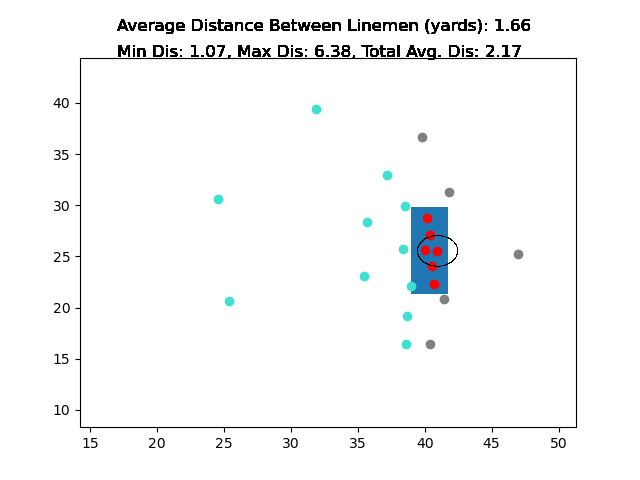

# Model Building


When selecting a baseline model there were several target variables considered. Shown in figure 2, the best performance came from using the 'Event Allowed' feature, which signified a clean or interrupted throw. In addition, we attempted a more complex approach creating a neural network in Tensorflow, but since we prioritized interpretability, we decided to focus more on the regression approaches. Shown in figure 3, there was an extreme imbalance of sacks to throws. To account for this, we grouped a hurry, sack, or qb hit together, and denoted any of those as an 'event' or interrupted throw, which proved to be much more proportional to the number of throws.


<b> Figure 2 </b>

| Target Variable   | Key Performance Indicator (KPI) |
| ----------- | ----------- |
| Event Allowed (Logistic Regression)   | Balanced Accuracy: 0.77    |
| team_win_percentage (Linear Regression) | MSE: 0.04  |
| throwRatio (Linear Regression)   | MSE: 0.018     |




<b> Figure 3 </b>

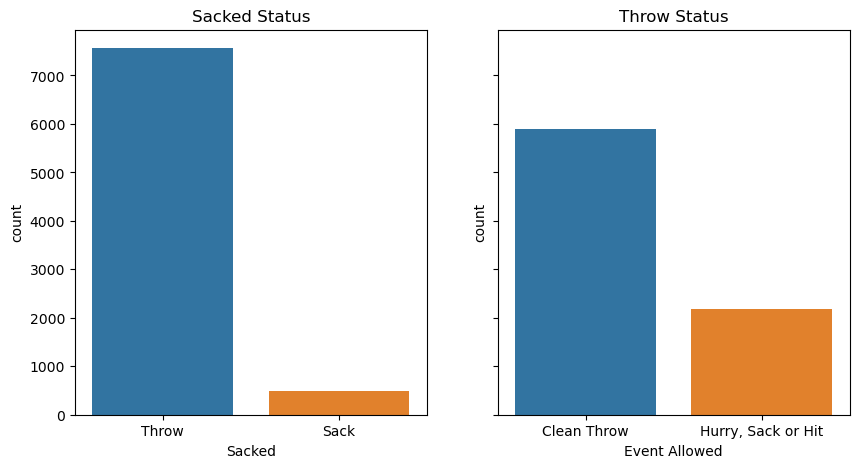


The final dataset used for modeling featured 8,044 rows, with 16 features. The data was then randomly split using 80% training, and 20% test. Due to the extreme imbalance of clean throws, the training set was downsampled to meet the number of Interrupted Throws. After this transformation, the training set featured 3,470 records with 16 columns. The test reamined unbalanced, and featured 1,690 plays.

The data dictionary in figure 4 shows the features used in the training and test sets, with the final target variable being the 'event_allowed' feature.

<b> Figure 4 </b>

| Column | Description |
| ----------- | ----------- |
| quarter  | The quarter of the play (int)  |
| offenseFormation | Encoded to represent the offensive formation (int)   |
| succseful_ratio  | The number ratio of succsesful plays to all plays up to that  point in the game. (float) |
| yardsToGo | Number of yards to go to a first down (int)  |
| absoluteYardlineNumber | The distnace to the endzone (int)  |
| possessionTeam_encoded | Encoded value to represent the team with the ball (int) |
| defensiveTeam_encoded | Encoded value to represent the team on defense (int)  |
| dropBackType | Encoded value to represent the dropback type of the quarterback (int)  |
| average_linemen_distance | The average distance between linemen (float)|
| defendersInBox | Number of defenders in close proximity to line-of-scrimmage (int)|
| avg_height | The average height of the bounding box during the last second of the play (float) |
| avg_width | The average width of the bounding box during the last second of the play (float) |
| time_to_throw | The time between when the ball is snapped, and when the quarterback threw the ball (float)  |
| total_circle_time | The total amount of time that defenders were present in the circle around the quarterback (int)  |
| <b> Event Allowed </b> | Used as the target variable to represent a clean throw (1) or an interrupted throw (0).|





## Final Model Exploration

<b> Logisitc Regression </b>

With the features previously defined, inputs were standardized to then fit a logisitc regression model to predict the throw status, which was represented by the 'event_allowed' feature. Figure 5 displays the results of key performance idicators of the model.


<b> Figure 5 </b>

| Key Performance Indicator | Value |
| ----------- | ----------- |
| Accuracy  | 0.79   |
| Balanced Accuracy | 0.77  |
| F-1 Score  | 0.85 |
| Precision | 0.90  |
| Recall | 0.81  |

​


<b> Performance Score Calculation </b>

Using the results from the logistic regression, we then transferred the weights and bias to calculate the performance score. This was done by taking the dot product between a play's features and the weights learned from the model. Figure 6 displays the learned weights of the features.


$PerformanceScore = RegressionWeights \cdot PlayFeaures + RegressionBias $


<b> Figure 6 </b>

 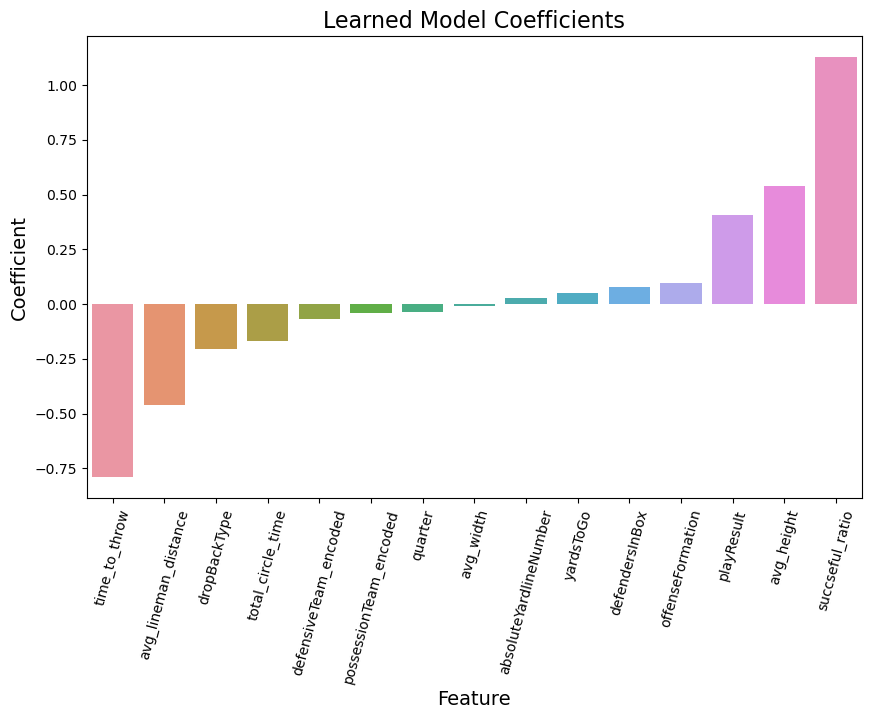
 
​
​
## Model Evaluation
To evaluate the performance of the metric, we looked at the relationship between the average performance score, and the team win percentage through 8 games. Average performance score was calculated by taking the average of a team's plays for each week, and then taking the average of those values. This was to account for the variability of a team's weekly performance. As shown in the following plot, a higher metric score typically equates to a higher win percentage. This gives offensive line coaches a performance idicator to maximize each week in attempt to win more games.
​
​

<b> Figure 7 </b>
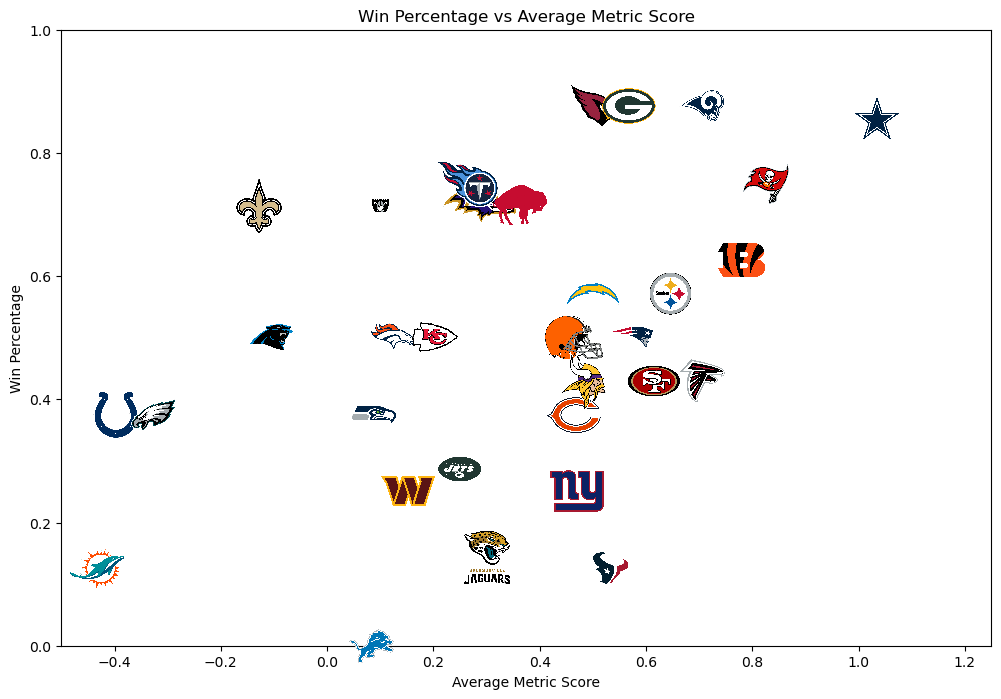

# Relevance for coaches 
As the NFL season progresses, the performance of teams and the availability of their players continues to change. Using this metric, coaches have the ability to understand a team's performance each week to regularly make adjustments and measure their performance against competition. In addition, the model also found several created features to be indicative of the offensive line performance. As shown in figure 6, the total amount of time in the QB circle and the average distance between linemen were two of the most negative coefficients in the model. Knowing the impact these features have on the metric, coaches are then able to take these insights to maximize their performance metric and win percentage.

# Limitations and Future Implementations
One approach attempted was to compare the rankings of the average performance score to the week [10 PFF power rankings](https://www.pff.com/news/nfl-week-10-offensive-line-rankings-2021). However, due to the limited amount of publically available data, this proved to be difficult. This could add value in the future to give teams the ability to compare themselves to others. 

In future implementations having more data for all games throughout the season would help to improve the overall accuracy of the model. Although not as interpretable, other versions of this analysis could use more complex modeling approaches, such as neural networks or transformers.

# Appendix
All data for this project was provided through the NFL Big Data Bowl 2023

All code to produce the results discussed in this notebook can be found at this [GitHub Repo](https://github.com/ZGalante/NFLBigDataBowl)
